# Prophet(시계열 예측 도구)

### 1. 시계열 예측이 왜 어려운지
### 2. 시계열 예측에 필요한 data 형태가 어떤지

In [63]:
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.make_holidays import make_holidays_df

In [54]:
year = 5
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=365*year)
print(start_date, end_date)

nvidia = yf.download(
    tickers = "NVDA", 
    start = start_date,
    end = end_date
)

nvidia.head()

2020-09-09 2025-09-08


C:\Users\user\AppData\Local\Temp\ipykernel_15900\157510653.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvidia = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-09-09,12.677021,12.770989,12.195214,12.362961,736200000
2020-09-10,12.274974,13.026223,12.130656,12.950450,698684000
2020-09-11,12.128163,12.614706,11.860216,12.448205,636928000
2020-09-14,12.833800,13.275228,12.593521,13.041928,1201744000
2020-09-15,12.952195,13.259026,12.789433,13.240331,727556000


In [55]:
nvidia.columns = nvidia.columns.droplevel(1) # 2번째 삭제
nvidia.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-09,12.677021,12.770989,12.195214,12.362961,736200000
2020-09-10,12.274974,13.026223,12.130656,12.950450,698684000
2020-09-11,12.128163,12.614706,11.860216,12.448205,636928000
2020-09-14,12.833800,13.275228,12.593521,13.041928,1201744000
2020-09-15,12.952195,13.259026,12.789433,13.240331,727556000


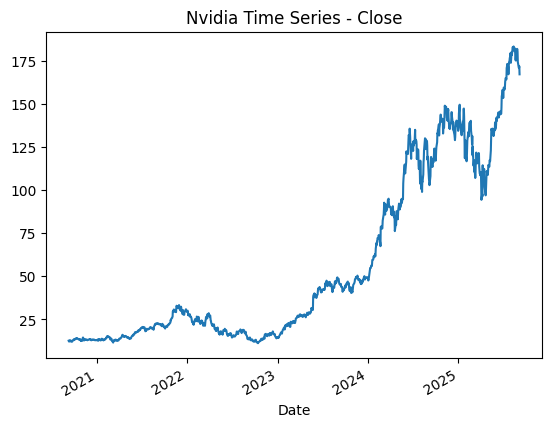

In [56]:
nvidia['Close'].plot()
plt.title('Nvidia Time Series - Close')
plt.show()

In [57]:
data = nvidia.reset_index()[['Date', 'Close']]
print(data) # index를 가지고 data를 가져옴

data = data.rename(columns={'Date' : 'ds', 'Close' : 'y'})
data.head()

Price       Date       Close
0     2020-09-09   12.677021
1     2020-09-10   12.274974
2     2020-09-11   12.128163
3     2020-09-14   12.833800
4     2020-09-15   12.952195
...          ...         ...
1249  2025-08-29  174.179993
1250  2025-09-02  170.779999
1251  2025-09-03  170.619995
1252  2025-09-04  171.660004
1253  2025-09-05  167.020004

[1254 rows x 2 columns]


Price,ds,y
0,2020-09-09,12.677021
1,2020-09-10,12.274974
2,2020-09-11,12.128163
3,2020-09-14,12.833800
4,2020-09-15,12.952195


In [58]:
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet.fit(data)

10:15:11 - cmdstanpy - INFO - Chain [1] start processing
10:15:11 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
# 향후 1년 예측
result = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(result)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-09-09,10.930756,1.396871,21.022826
1,2020-09-10,10.725559,1.350579,20.577884
2,2020-09-11,10.232276,-0.102008,21.076510
3,2020-09-14,9.472674,-0.661507,19.401407
4,2020-09-15,9.293311,-0.851067,19.075107
...,...,...,...,...
1614,2026-09-01,196.138950,173.928147,221.353390
1615,2026-09-02,195.765014,173.003134,223.122045
1616,2026-09-03,195.479622,171.657425,219.989475
1617,2026-09-04,194.853787,172.652918,220.554627


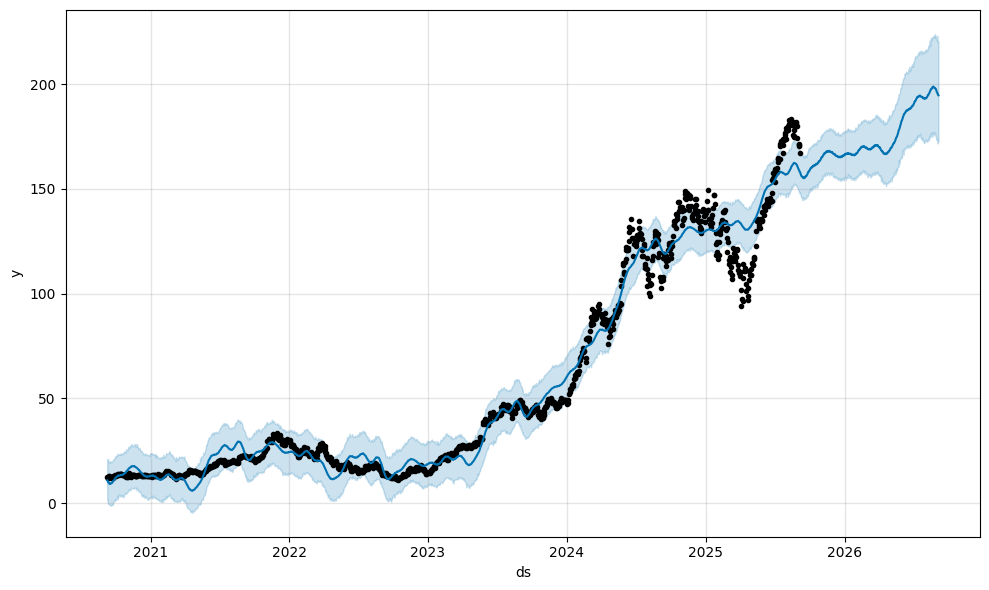

In [60]:
prophet.plot(forecast)
plt.show()

# 변수가 너무 많아서 추세만으로 예측하는 것은 어려움
# LLM을 통해 변수값(뉴스 등)을 추가하여 예측하는 것이 도움이 됨

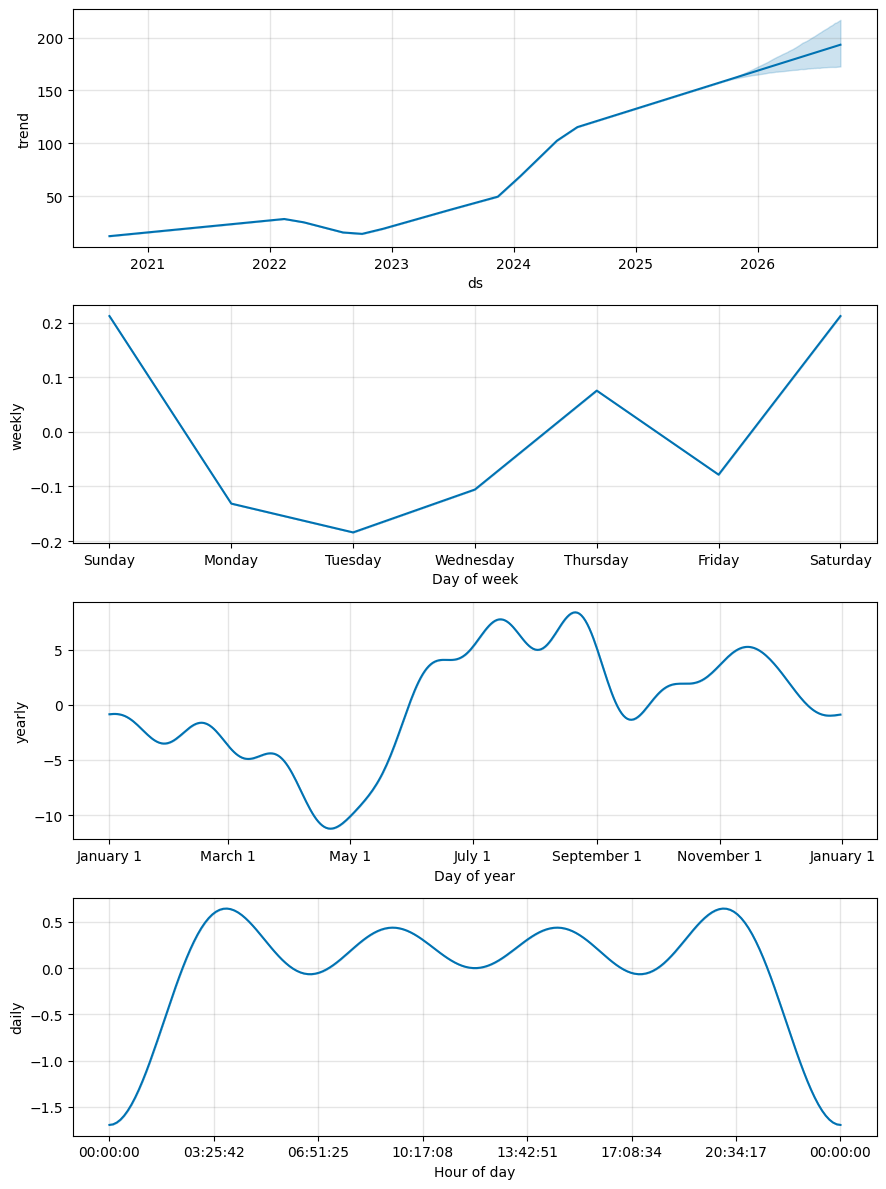

In [61]:
prophet.plot_components(forecast)
plt.show()

In [73]:
holidays = make_holidays_df(
    year_list = [2025],
    country = 'US'
)

holidays

,ds,holiday
0,2025-01-01,New Year's Day
1,2025-05-26,Memorial Day
2,2025-06-19,Juneteenth National Independence Day
3,2025-07-04,Independence Day
4,2025-09-01,Labor Day
5,2025-11-11,Veterans Day
6,2025-11-27,Thanksgiving Day
7,2025-12-25,Christmas Day
8,2025-01-20,Martin Luther King Jr. Day
9,2025-02-17,Washington's Birthday
